### sklearn.decomposition.PCA
- class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)

In [5]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

In [12]:
columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
df = pd.DataFrame(iris.data, columns=columns)
df['target']=iris.target
print(df.shape)

(150, 5)


In [13]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


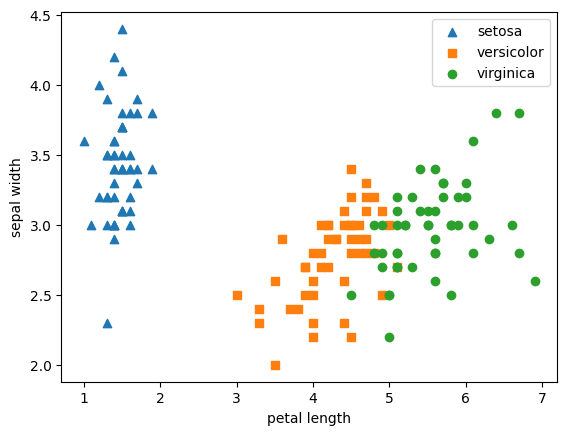

In [26]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['petal length']
    y_axis_data = df[df['target']==i]['sepal width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('petal length')
plt.ylabel('sepal width')
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(df)

In [29]:
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [30]:
pca_columns=['pca_component_1', 'pca_component_2']
df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_pca['target']=iris.target
df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


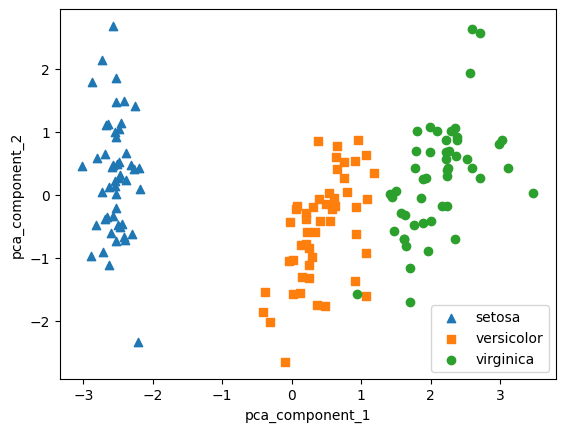

In [31]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df_pca[df_pca['target']==i]['pca_component_1']
    y_axis_data = df_pca[df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
rfc = RandomForestClassifier(random_state=156)
scores = cross_val_score(rfc, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [34]:
X = df_pca[['pca_component_1', 'pca_component_2']]
y = df_pca['target']
scores_pca = cross_val_score(rfc, X, y, scoring='accuracy', cv=3)
print(scores_pca)
print(np.mean(scores_pca))

[0.98 0.98 1.  ]
0.9866666666666667


In [36]:
iris = load_iris()
pca = PCA(n_components=2)
pca.fit(iris)
iris_pca = pca.transform(iris)
pca_columns=['pca_component_1', 'pca_component_2']
df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_pca['target']=iris.target
scores_pca = cross_val_score(rfc, X, y, scoring='accuracy', cv=3)
print(scores_pca)
print(np.mean(scores_pca))

TypeError: float() argument must be a string or a real number, not 'Bunch'